In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import seaborn as sns

In [2]:
train_path= r"fruits-360_dataset_100x100/fruits-360/Training"
test_path= r"fruits-360_dataset_100x100/fruits-360/Test"

In [3]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    batch_size=32
)

for images, labels in train_dataset.take(1):  # Check one batch
    print(images.shape, labels.shape)
    
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    batch_size=32
)

for images, labels in test_dataset.take(1):  # Check one batch
    print(images.shape, labels.shape)

Found 70491 files belonging to 141 classes.
(32, 256, 256, 3) (32,)
Found 23619 files belonging to 141 classes.
(32, 256, 256, 3) (32,)


In [4]:
# why split data into batches?
# By dividing the dataset into smaller batches,
# only a subset of the data is loaded into memory at a time,
# which allows you to train on large datasets that would otherwise not fit into memory.

In [5]:
selected_classes = [0, 1, 2, 3, 4]

In [6]:
# filter selected classes


train_images=[]
train_labels=[]
test_images = []
test_labels = []

for image_batch,label_batch in train_dataset:
    mask = np.isin(label_batch.numpy(), selected_classes)
    train_images.extend(image_batch.numpy()[mask])
    train_labels.extend(label_batch.numpy()[mask])
    
    
for image_batch,label_batch in test_dataset:
    mask = np.isin(label_batch.numpy(), selected_classes)
    test_images.extend(image_batch.numpy()[mask])
    test_labels.extend(label_batch.numpy()[mask])



In [7]:
# Convert lists to NumPy arrays
train_images = np.array(train_images)
test_images = np.array(test_images)
# shape becomes 2D 
train_images= train_images.reshape(train_images.shape[0],-1)
test_images= test_images.reshape(test_images.shape[0],-1)

In [8]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [9]:
model.fit(train_images, train_labels)

LogisticRegression()

In [10]:
labels_pred= model.predict(test_images)

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score , roc_curve, roc_auc_score ,log_loss

In [12]:
print("Logistic Regression Accuracy:", accuracy_score(test_labels, labels_pred))

Logistic Regression Accuracy: 0.9331651954602774


In [13]:
print("Logistic Regression confusion_matrix:\n", confusion_matrix(labels_pred,test_labels))

Logistic Regression confusion_matrix:
 [[157   0   0   0   0]
 [  0 152   0   0   0]
 [  0   0 148   0   0]
 [  0  12   0 119   0]
 [  0   0   0  41 164]]


In [14]:
print("Logistic Regression classification_report:\n", classification_report(labels_pred,test_labels))

Logistic Regression classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       0.93      1.00      0.96       152
           2       1.00      1.00      1.00       148
           3       0.74      0.91      0.82       131
           4       1.00      0.80      0.89       205

    accuracy                           0.93       793
   macro avg       0.93      0.94      0.93       793
weighted avg       0.94      0.93      0.93       793



In [15]:
from sklearn.preprocessing import label_binarize

# Binarize the labels (One-vs-Rest)
classes = selected_classes
y_test_binarized = label_binarize(test_labels, classes=classes)

In [16]:
y_probs = model.predict_proba(test_images)

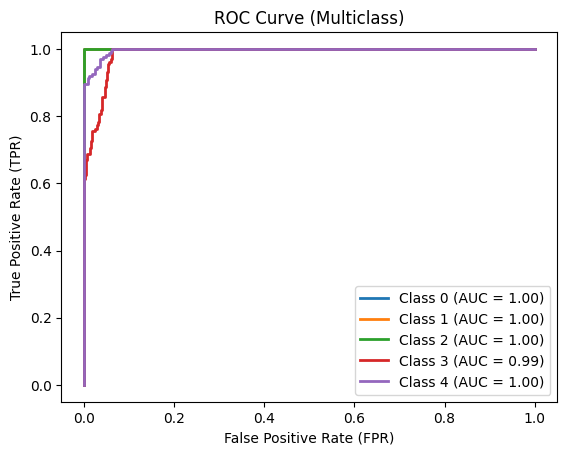

In [17]:
# Plot ROC for each class
for i, class_label in enumerate(classes):
    fpr, tpr, thresholds = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_probs[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})", linewidth=2)
    
plt.title("ROC Curve (Multiclass)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.show()

# For each class, the roc_curve function computes the False Positive Rate (FPR),
# True Positive Rate (TPR), 
# and decision thresholds.
# The roc_auc_score computes the Area Under the Curve (AUC) for each class.

In [18]:
# Ensure test_labels and test_images are NumPy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

y_probs = model.predict_proba(train_images)

test_losses = []
subset_sizes = np.linspace(100, len(test_images), 10, dtype=int)  # Divide into 10 parts

np.random.seed(5)  # For NumPy-based randomness

for size in subset_sizes:
    indices = np.random.choice(len(test_images), size=size, replace=False)  
    subset_labels = test_labels[indices]  
    subset_probs = y_probs[indices]        
    
    # Ensure subset contains at least two unique classes
    if len(np.unique(subset_labels)) > 1:
        loss = log_loss(subset_labels, subset_probs)  # Compute log loss
        test_losses.append(loss)
        
        
        
print(test_losses)

[27.226265189944012, 27.64960020054917, 27.55158788508074, 27.460785697345745, 26.308436653166183, 26.92835996875985, 27.779812894132696, 27.113100309877943, 27.45431335885715, 27.221722276737534]


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=8)
knn_model.fit(train_images, train_labels)

KNeighborsClassifier(n_neighbors=8)

In [20]:
labels_pred= knn_model.predict(test_images)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score , roc_curve, roc_auc_score ,log_loss

In [22]:
print("Knn Accuracy:", accuracy_score(test_labels, labels_pred))

Knn Accuracy: 0.9520807061790668


In [23]:
print("Knn confusion_matrix:\n", confusion_matrix(labels_pred,test_labels))

Knn confusion_matrix:
 [[157   0   0   0   0]
 [  0 150   0   0   0]
 [  0   0 148   0   0]
 [  0  14   0 136   0]
 [  0   0   0  24 164]]


In [24]:
print("Knn classification_report:\n", classification_report(labels_pred,test_labels))

Knn classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       0.91      1.00      0.96       150
           2       1.00      1.00      1.00       148
           3       0.85      0.91      0.88       150
           4       1.00      0.87      0.93       188

    accuracy                           0.95       793
   macro avg       0.95      0.96      0.95       793
weighted avg       0.96      0.95      0.95       793



In [25]:
from sklearn.preprocessing import label_binarize

# Binarize the labels (One-vs-Rest)
y_test_binarized = label_binarize(test_labels, classes=classes)

In [26]:
y_probs = knn_model.predict_proba(test_images)

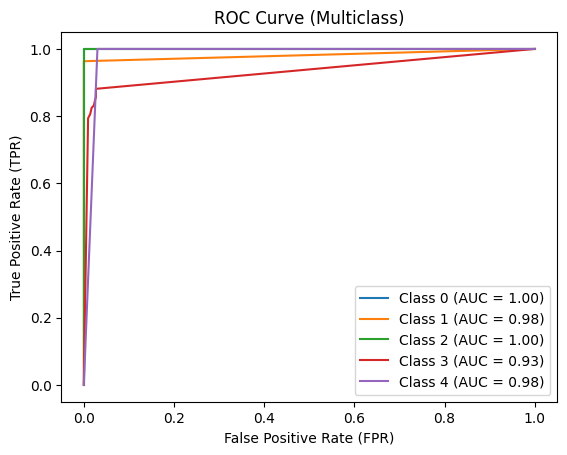

In [27]:
# Plot ROC for each class
for i, class_label in enumerate(classes):
    fpr, tpr, thresholds = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_probs[:, i])

    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")
plt.title("ROC Curve (Multiclass)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.show()

In [28]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

y_probs = knn_model.predict_proba(test_images)

test_losses = []
subset_sizes = np.linspace(200, len(test_images), 10, dtype=int)  # Divide into 10 subsets

np.random.seed(50)  # For NumPy-based randomness


for size in subset_sizes:
    indices = np.random.choice(len(test_images), size=size, replace=False)  # Random subset
    subset_labels = test_labels[indices]
    subset_probs = y_probs[indices]

    # Ensure subset contains at least two unique classes
    if len(np.unique(subset_labels)) > 1:
        loss = log_loss(subset_labels, subset_probs)  
        test_losses.append(loss)

print(test_losses)

[1.457047489538144, 0.5825072681906481, 1.3289186452862003, 1.2135121734326169, 1.1261155619445402, 1.3933187879964517, 1.3017206008022297, 1.065631408242281, 1.1691320730711203, 1.1674649960607695]
